In [796]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-white")


C:\Users\Kevin\AppData\Local\Temp\ipykernel_5924\1806114291.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


#### 0 a)

<AxesSubplot: xlabel='Minutes', ylabel='SEK'>

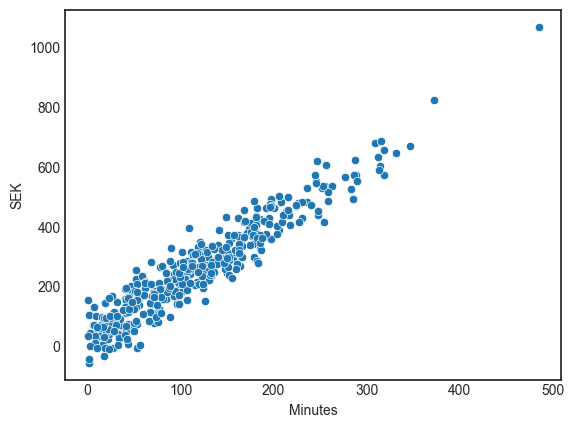

In [815]:
np.random.seed(42)

df = pd.DataFrame()

df['Minutes'] = np.random.normal(100, 100, size=400)
df['Minutes'] = df['Minutes'].abs()

noise = np.random.normal(0, 50, size=400)

df['SEK'] = 2 * df['Minutes'] + 25 + noise

sns.scatterplot(data=df, x=df["Minutes"], y=df['SEK'])

#### 0 b)

<AxesSubplot: xlabel='Minutes', ylabel='SEK'>

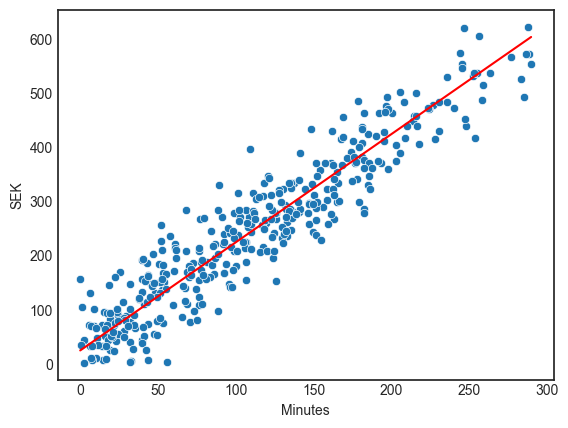

In [798]:
df = df.drop(df[df['Minutes'] > 300].index)
df = df.drop(df[df['SEK'] < 0].index)

sns.scatterplot(data=df, x=df["Minutes"], y=df['SEK'])


x, y = df['Minutes'], df['SEK']
b0 = 25
b1 = 2

y_hat = lambda x: b0 + b1*x

sns.lineplot(data=df, x=df["Minutes"], y=y_hat(x), color='red')


#### 0 c)

In [799]:
df.head()

,Minutes,SEK
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


#### 1 a)

In [800]:
def train_test_split(df: pd.DataFrame, train_fraction: float, seed: int, replace: bool) -> tuple:
    numeric_fraction = int(len(df) * train_fraction) # using int() to round. is using round better or worse?
    
    train = df.sample(n=numeric_fraction, replace=replace, random_state=seed)
    test = df.drop(train.index)
    
    return (train['Minutes'], test['Minutes'], train['SEK'], test['SEK'])

In [801]:
# (X_train, X_test, y_train, y_test)
x_train, x_test, y_train, y_test = train_test_split(df, train_fraction=0.7, seed=42, replace=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((266,), (115,), (266,), (115,))

In [802]:
# Convert from pandas vectors to numpy (n, 2) matrices
x_train_matrix = np.array(x_train).reshape(-1, 1)
x_test_matrix = np.array(x_test).reshape(-1, 1)

y_train_matrix = np.array(y_train).reshape(-1, 1)
y_test_matrix = np.array(y_test).reshape(-1, 1)

x_train_matrix.shape, x_test_matrix.shape, y_train_matrix.shape, y_test_matrix.shape

((266, 1), (115, 1), (266, 1), (115, 1))

#### 2

In [803]:
# Add slope
x_train_matrix = np.c_[np.ones(len(x_train)), x_train]
x_test_matrix = np.c_[np.ones(len(x_test)), x_test]

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
#regression_fit = np.linalg.pinv(x_train_matrix.T @ x_train_matrix) @ x_train_matrix.T @ y_train_matrix

beta_hat = regression_fit(x_train_matrix, y_train)

beta_hat

array([32.22147722,  1.91050591])

<AxesSubplot: xlabel='Minutes', ylabel='SEK'>

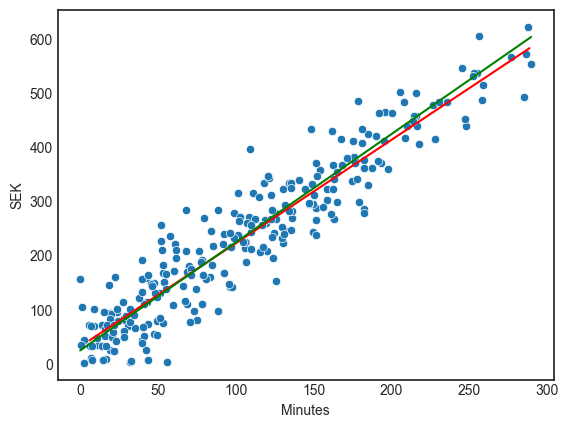

In [804]:
# Remove redundent dimention. convert to vectors
y_hat = lambda x: beta_hat[0] + beta_hat[1] * x

sns.scatterplot(x=x_train, y=y_train)
sns.lineplot(x=x_test, y=y_hat(x_test), color='red')

# Ground truth
hat = lambda x: 25 + 2*x
sns.lineplot(x=df["Minutes"], y=hat(x), color='green')

#### 3 a)

<AxesSubplot: xlabel='Minutes', ylabel='SEK'>

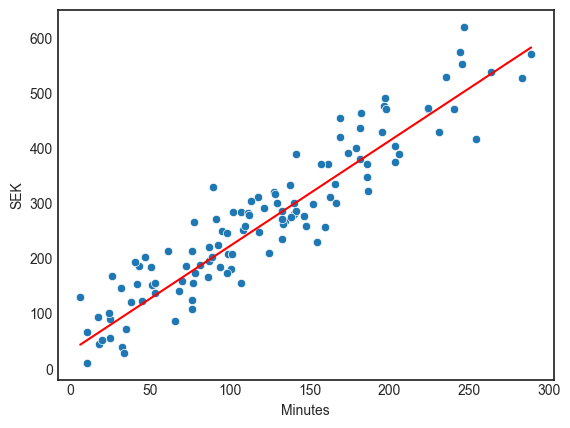

In [805]:
sns.scatterplot(x=x_test, y=y_test)
sns.lineplot(x=x_test, y=y_hat(x_test), color='red')

#### 3 b)

In [806]:
# training - we fit the weights beta_hat to the training data
beta_hat = regression_fit(x_train_matrix, y_train_matrix)
print(f"Regression coefficients beta: {beta_hat.flatten()}")

# we generalize the predict to work for matrix with many samples
predict = lambda X, weights: X @ weights

# note that X_test shape is (60, 1) and beta_hat shape needs to be (4,1)
y_hat = predict(x_test_matrix, beta_hat)

print(f"Shape of y_hat is {y_hat.shape}, i.e. prediction for each sample in test set")

print(f"TV, Radio, Newspaper spending of {x_test.iloc[0]} gives prediction of {y_hat[0][0]:.1f} thousand units")
print(f"The true sale label is y = {y_test.iloc[0]} thousand units")

Regression coefficients beta: [32.22147722  1.91050591]
Shape of y_hat is (115, 1), i.e. prediction for each sample in test set
TV, Radio, Newspaper spending of 86.17356988288154 gives prediction of 196.9 thousand units
The true sale label is y = 167.37838861807444 thousand units


In [807]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m))  # removes the extra dimension

MAE = 1 / m * np.sum(np.abs(y_test - y_hat))
MSE = 1 / m * np.sum((y_test - y_hat) ** 2)
RMSE = np.sqrt(MSE)

for metric in [
    ("Mean absolute error", "MAE", "k units"),
    ("Mean squared error", "MSE", "M units"),  
    ("Root mean square error", "RMSE", "k units"),
]:
    print(f"{metric[0]}: {eval(metric[1]):.2f}{metric[2]}")

Mean absolute error: 40.12k units
Mean squared error: 2401.58M units
Root mean square error: 49.01k units


#### 4

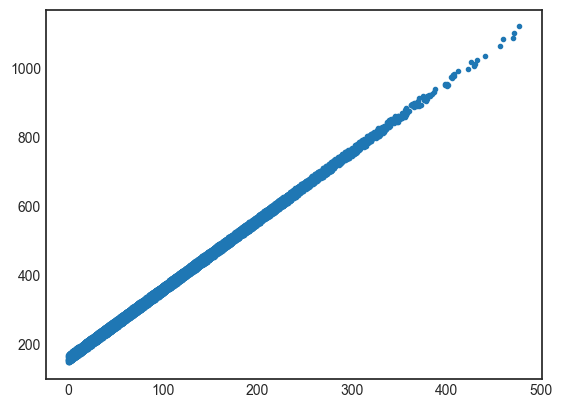

In [814]:
df = pd.DataFrame()


df['Cost/minute'] = np.absolute(np.random.normal(100, 100, size=10000))
df.insert(0, "Starting cost", 25)
df['Cost/sms'] = np.random.uniform(0, 50, size=10000)
df['Cost/Gb'] = np.absolute(np.random.normal(0, 2))

Epsilon = np.random.normal(0, 50)


df['Total cost'] = df['Starting cost'] + (2 * df['Cost/minute']) + (0.5 * df['Cost/sms']) + (50 * df['Cost/Gb']) + Epsilon
df
